# Resources
[This Notebook](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/CodeDemo.ipynb)

Libraries:
* [Mockaroo](https://www.mockaroo.com/)
* [Python - Faker Documentation](https://faker.readthedocs.io/en/master/)
* [R - Synthpop Documentation](https://www.synthpop.org.uk/resources.html)
* [R - Synthpop Shiny App](https://synthpop.shinyapps.io/synthpop/)
* [Synthpop - Further Reading](https://www.synthpop.org.uk/resources.html)

Code Books:
* [Binder - Python for those without a Python environment](https://mybinder.org/v2/gh/UKDataServiceOpen/Synthetic-Data/HEAD?filepath=code-demo%2FCodeDemo.ipynb)
* [RPub - R for those without an R environment](https://rpubs.com/josephallen1994/778921)

NATSAL:
* [NATSAL](https://www.natsal.ac.uk/)
* [UKDS Open teaching dataset and data dictionaries](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8786) 
* [Codebook](http://doc.ukdataservice.ac.uk/doc/8786/mrdoc/pdf/8786_natsal_open_codebook_feb21.pdf)
* [Dataset Processing](https://github.com/UKDataServiceOpen/Synthetic-Data/blob/main/code-demo/NATSAL/NATSAL.ipynb)

# Getting started
In this section, we will cover:
* Importing the packages we need,
* Importing the data we will use,
* Checking the data in 2 different ways. 


## Importing packages
To start with we need to import any packages beyond base Python we are using.
* Numpy - Support large multi-dimension arrays.
* Pandas - Pythons data manipulation library, built on top of numpy.
* Faker - Generates fake data.
* Matplotlib - configure plots, and pandas plotting

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!pip install Faker
from faker import Faker
import matplotlib.pyplot as plt

import os
!pip install seaborn
import seaborn as sns

## Importing data
Next we need to import the data with which we are going to work. 

In [24]:
print(os.listdir("input"))                    # a quick check on what we can import from our "inputs" folder
df= pd.read_csv('input/weight-height.csv')    # read in the .csv as a variable called "df"

['weight-height.csv']


## Checking the data
Quickly "sense check" the data we just imported. There are a few different ways to do that and I show you two here. 


In [26]:
df                                            # check the new variable by simply calling its name.

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [27]:
df.head(10)                                  # calling "data_variable.head(X)" prints the first X rows in the data_variable


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [29]:
df.head(X)                                  # Try changing the value of X. 
df.tail(X)                                  # What do you think 'tail' will do? Try it out!


# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

NameError: name 'X' is not defined

# Exploring the data
In this section, we will cover:
* Multiple ways to get an overview, and
* How to visualise the data.

In [21]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

## Data overviews

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


First we use 'df.info' to summarise some basic qualities of our data and we can see that
* we have 1000 rows, 
* 3 columns of 2 different types (1 object and 2 floats), and
* no missing data. 

In [20]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Next, 'describe' gives mathematical information that is another overview which shows the basic descriptive statistics. 

In [30]:
df.Height.value_counts()

63.486681    1
66.299193    1
71.295195    1
67.748990    1
62.605035    1
            ..
67.156538    1
66.313844    1
67.129498    1
66.488929    1
63.612811    1
Name: Height, Length: 10000, dtype: int64

Then, 'value_counts' can be useful ways to see if we have some values that are more common than others. 


This is not very useful for the 'Height' variable. Why do you think that is? 

In [31]:
df.VARIABLE_NAME.value_counts()               # Try counting the values of other fields. Are they all unique?

# NOTE! This cell will produce an error if you try to run it as it is now. What do you need to do to make it run correctly?

AttributeError: 'DataFrame' object has no attribute 'VARIABLE_NAME'

## Visualizations

<AxesSubplot:xlabel='Height', ylabel='Weight'>

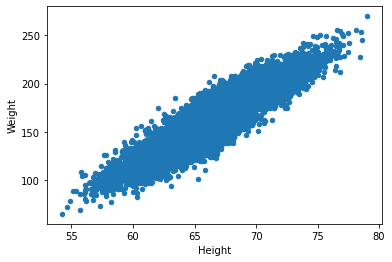

In [44]:
df.plot.scatter(x = 'Height', y = 'Weight')         # a basic scatter plot of height and weight using pandas

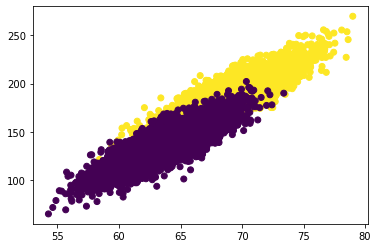

In [47]:
plt.scatter(df.Height,df.Weight, c = pd.Categorical(df.Gender).codes) # a scatter plot of height X weight using matplotlib
                                                                      # this time colour coded by gender

In [ ]:
df.info()

There are some problems here:
* This graph is small, probably hard to read
* Looks a bit dull
* the categories are clearly ordinal, that is 16-24 should probably be shown before 25-34 and so one
* missing titles and axis labels

We can configure matplotlib globally to resolve some of these for all future plots